In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# define polynomial feature function

In [2]:
def polynomial_dataframe(feature, degree):
    poly_data = pd.DataFrame()
    poly_data['power_1'] = feature
    if degree <= 1: return poly_data
    for i in range(2,degree+1):
        column = 'power_' + str(i)
        prev = 'power_' + str(i-1)
        poly_data[column] = poly_data[prev] * feature
    return poly_data

# sort by square feet in ascending order

In [3]:
sales = pd.read_csv('kc_house_data.csv/kc_house_data.csv')
sales = sales.sort_values(['sqft_living','price'])

# degree 1 polynomial

In [4]:
poly1_data = polynomial_dataframe(sales['sqft_living'], degree=1)

In [6]:
model1 = LinearRegression()
model1.fit(poly1_data, sales['price'])

LinearRegression()

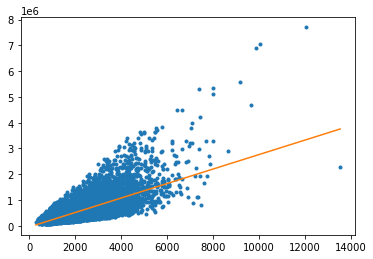

In [17]:
plt.plot(poly1_data['power_1'], sales['price'], '.')
plt.plot(poly1_data['power_1'], model1.predict(poly1_data), '-')
plt.show()

# degree 2,3 polynomials

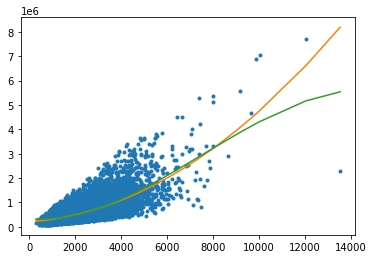

In [26]:
poly2_data = polynomial_dataframe(sales['sqft_living'], degree=2)
model2 = LinearRegression()
model2.fit(poly2_data, sales['price'])
poly3_data = polynomial_dataframe(sales['sqft_living'], degree=3)
model3 = LinearRegression()
model3.fit(poly3_data, sales['price'])

plt.plot(poly1_data['power_1'], sales['price'], '.')
# plt.plot(poly1_data['power_1'], model1.predict(poly1_data), '-')
plt.plot(poly2_data['power_1'], model2.predict(poly2_data), '-')
plt.plot(poly3_data['power_1'], model3.predict(poly3_data), '-')
plt.show()

# degree 15 polynomial, the variance looks large

[ 1.71289488e-05  4.21890991e-02  4.60100653e-06 -4.52583777e-10
 -2.28420214e-14 -2.19109097e-16 -5.24796523e-16  3.49221476e-16
 -2.01148770e-16 -2.67950411e-16  1.00544363e-16  7.25571766e-16
  4.19356250e-16 -4.03452461e-16  4.79205036e-17]


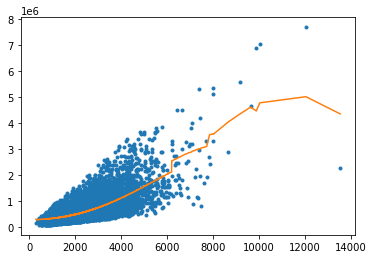

In [29]:
poly15_data = polynomial_dataframe(sales['sqft_living'], degree=15)
model15 = LinearRegression()
model15.fit(poly15_data, sales['price'])

print(model15.coef_)
plt.plot(poly1_data['power_1'], sales['price'], '.')
plt.plot(poly15_data['power_1'], model15.predict(poly15_data), '-')
plt.show()

# degree 15 polynomial on splitted data sets

set 1 [ 1.76203652e-05  4.45076625e-02  4.14384165e-06 -4.48307006e-10
 -2.26036160e-14  1.00260826e-16 -7.14372298e-16  3.01348053e-16
 -1.77054524e-16 -1.28529758e-15  1.16433802e-16  5.51733093e-16
  1.96542897e-16 -3.19037417e-16 -3.80201504e-16]


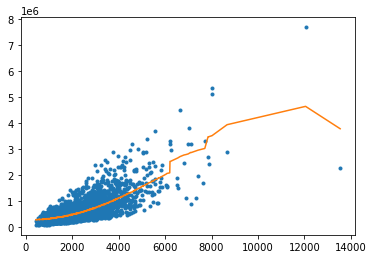

set 2 [ 3.00249710e-05  6.12987957e-02 -2.48027357e-06  1.09033036e-10
 -1.77082501e-14  8.00634999e-16 -3.52100499e-16 -2.89342031e-16
 -6.00675036e-16  3.72140048e-16  7.13964232e-16  7.59137214e-16
  1.04441857e-15 -4.68182210e-16  1.34015334e-15]


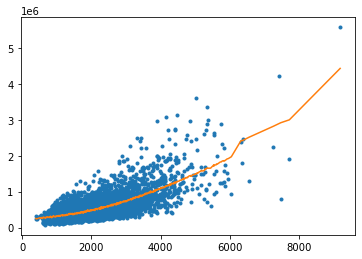

set 3 [ 3.06040268e-05  6.77524111e-02 -5.35887341e-06  4.62209829e-10
 -1.31471080e-14 -1.42358238e-16 -3.60833621e-16  5.65503096e-16
  4.35861851e-16  5.28464990e-16 -2.21575141e-16  1.13152437e-15
  6.07220706e-16  3.29339151e-16 -2.59168381e-16]


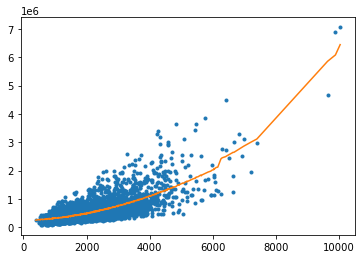

set 4 [ 2.92540496e-05  5.47251806e-02 -1.42373522e-06  7.25740599e-11
  3.46682562e-14 -1.24271725e-15 -4.01277794e-16  8.93804740e-16
 -4.96004837e-16 -5.39429373e-16  2.61186423e-16  3.95151655e-16
  2.88213711e-16 -1.03711508e-15 -3.22110900e-16]


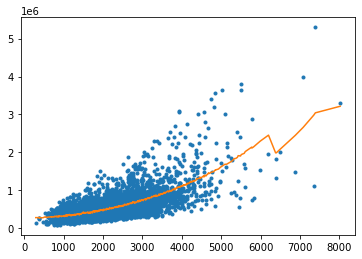

In [34]:
for i in range(1,5):
    salesi = pd.read_csv('wk3_kc_house_set_'+str(i)+'_data.csv/wk3_kc_house_set_'+str(i)+'_data.csv')
    salesi = salesi.sort_values(['sqft_living','price'])
    polys_data = polynomial_dataframe(salesi['sqft_living'], degree=15)
    model = LinearRegression()
    model.fit(polys_data, salesi['price'])
    print('set '+str(i),model.coef_)
    plt.figure(i)
    plt.plot(polys_data['power_1'],salesi['price'], '.')
    plt.plot(polys_data['power_1'], model.predict(polys_data), '-')
    plt.show()

# model selection among different polynomial degrees

In [53]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv/wk3_kc_house_train_data.csv')
train_data = train_data.sort_values(['sqft_living','price'])
test_data = pd.read_csv('wk3_kc_house_test_data.csv/wk3_kc_house_test_data.csv')
test_data = test_data.sort_values(['sqft_living','price'])
valid_data = pd.read_csv('wk3_kc_house_valid_data.csv/wk3_kc_house_valid_data.csv')
valid_data = valid_data.sort_values(['sqft_living','price'])


In [54]:
def compute_RSS(model, input_features, output):
    totalSS = ((output - output.mean())**2).sum()
    RSS = (1 - model.score(input_features, output)) * totalSS
    return RSS

In [55]:
rss = []
for i in range(1,16):
    data = polynomial_dataframe(train_data['sqft_living'], degree=i)
    data_v = polynomial_dataframe(valid_data['sqft_living'], degree=i)
    model = LinearRegression()
    model.fit(data, train_data['price'])
    RSS = compute_RSS(model, data_v, valid_data['price'])
    rss.append(RSS)
    print(str(i)+" %.6e"%RSS)
num_degree = min(range(1,16), key= lambda i: rss[i-1])
print(num_degree)

1 6.290979e+14
2 6.239551e+14
3 6.258203e+14
4 6.299873e+14
5 6.233737e+14
6 6.232527e+14
7 6.231607e+14
8 6.233363e+14
9 6.233372e+14
10 6.234366e+14
11 6.235469e+14
12 6.233395e+14
13 6.233510e+14
14 6.232708e+14
15 6.233357e+14
7


In [56]:

data = polynomial_dataframe(train_data['sqft_living'], degree=num_degree)
data_t = polynomial_dataframe(test_data['sqft_living'], degree=num_degree)
model = LinearRegression()
model.fit(data, train_data['price'])
RSS = compute_RSS(model, data_t, test_data['price'])
rss.append(RSS)
print(str(num_degree)+" %.6e"%RSS)

7 1.367590e+14
